<h1><center>Mutli Collinearity</center></h1>

<h3>What is Multi-Collinearity?</h3>
Multi-collinearity occurs in statistical models when two or more predictor variables are highly correlated, meaning they contain similar information about the variance within a given dataset. This situation can make it difficult to determine the individual effect of each predictor on the dependent variable, potentially leading to unreliable and unstable estimates of regression coefficients.

<h3>Practical By Using California Housing Data</h3>

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [16]:
data = fetch_california_housing()

df=pd.DataFrame(data.data, columns=data.feature_names)
df['price']=data.target

In [17]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

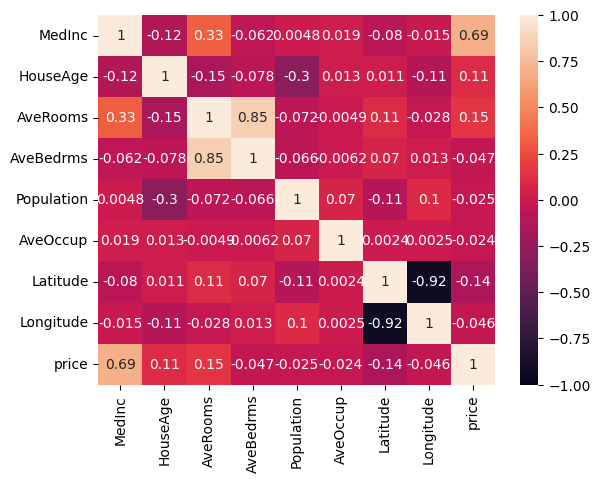

In [18]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

<h3>Clustermap for this given dataset.</h3>
A clustermap is a type of data visualization that combines hierarchical clustering and heatmap representation. It is commonly used in data analysis to display patterns in high-dimensional data and to identify groups of similar items or features.

<Figure size 1000x1000 with 0 Axes>

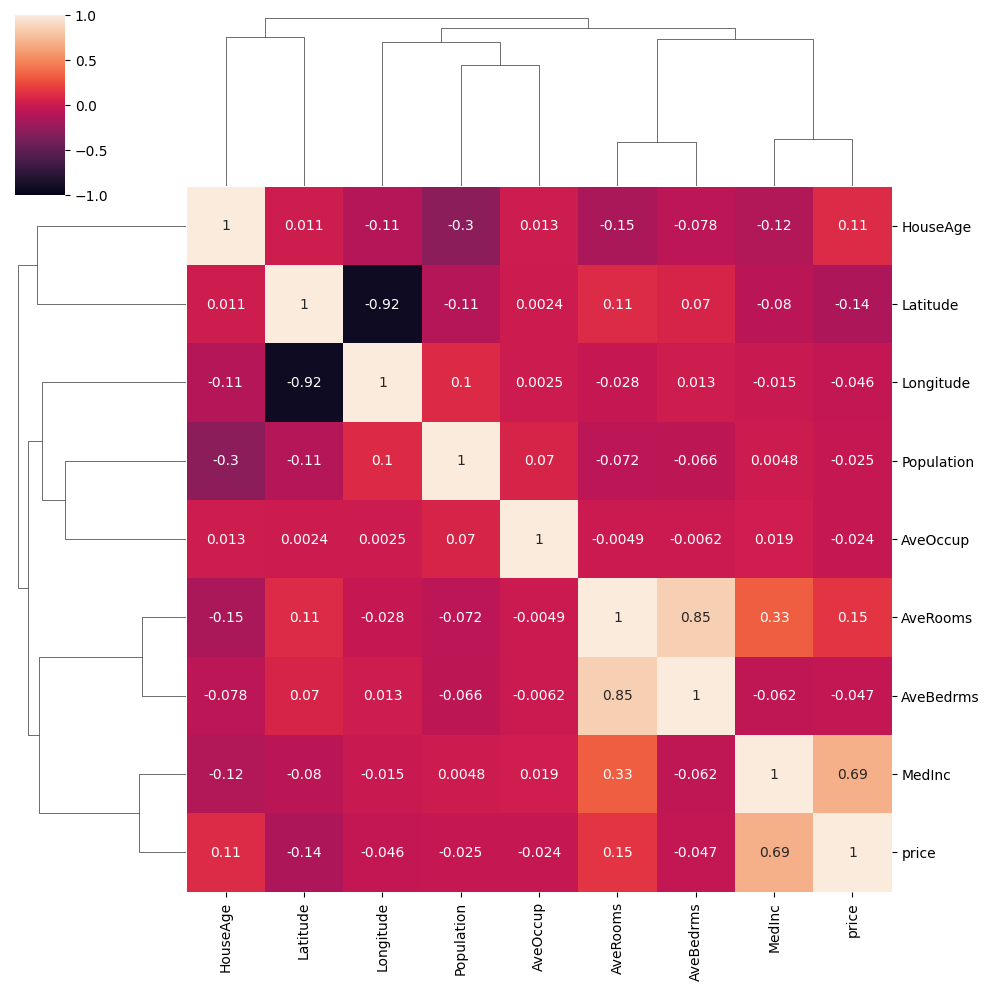

In [19]:
# Clustermap example
plt.figure(figsize=(10,10))
sns.clustermap(data=df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

<h3>What is VIF?</h3>
Variance Inflation Factor (VIF) is a measure used to detect multicollinearity in regression analysis. It quantifies how much the variance of a regression coefficient is inflated due to the presence of multicollinearity with other predictor variables.

- Calculation: VIF is calculated for each predictor variable by performing a regression of that variable against all other predictor variables. The VIF for a predictor is given by: VIF= 1/(1-R<sup>2</sup>) 
where R<sup>2</sup> is the coefficient of determination from the regression of that predictor on all other predictors.
​
- High VIF values suggest that the predictor variables are highly collinear, which can make the model's estimates unstable and the interpretation of the predictors' individual effects difficult.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=df.columns


In [21]:
vif['VIF']=[variance_inflation_factor(df.values, i)  for i in range(len(df.columns))]
vif

,Features,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,price,9.285659


In [30]:
df1=df.copy()
df1.drop('Longitude', axis=1, inplace=True)

vif1=pd.DataFrame()
vif1['Features']=df1.columns
vif1['VIF']=[variance_inflation_factor(df1.values, i) for i in range(len(df1.columns)) ]
vif1

,Features,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,price,9.193500


In [35]:
df2=df1.copy()
df2.drop('Latitude', axis=1, inplace=True)

vif2=pd.DataFrame()
vif2['Features']=df2.columns
vif2['VIF']=[variance_inflation_factor(df2.values, i) for i in range(len(df2.columns)) ]
vif2

,Features,VIF
0,MedInc,15.341145
1,HouseAge,4.532476
2,AveRooms,43.191063
3,AveBedrms,35.560275
4,Population,2.323375
5,AveOccup,1.099389
6,price,9.042708


In [37]:
df3=df2.copy()
df3.drop('AveRooms', axis=1, inplace=True)

vif3=pd.DataFrame()
vif3['Features']=df3.columns
vif3['VIF']=[variance_inflation_factor(df3.values, i) for i in range(len(df3.columns)) ]
vif3

,Features,VIF
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,price,8.607339


<h3>What is RFE?</h3>

Recursive Feature Elimination (RFE) is a feature selection technique used in machine learning to identify and rank the most important features for a model. It works by:

- Training: Initially training a model using all features.
- Ranking: Ranking features based on their importance or contribution to the model's performance.
- Elimination: Iteratively removing the least important features and retraining the model until a desired number of features is reached.


RFE helps improve model performance by eliminating irrelevant or redundant features, making the model simpler and more interpretable.

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

rfe=RFE(estimator=LinearRegression(), n_features_to_select=4)
rfe.fit(X,y)


RFE(estimator=LinearRegression(), n_features_to_select=4)

In [42]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True])

<table border="1">
  <tr>
    <th>Method</th>
    <th>When to Use</th>
  </tr>
  <tr>
    <td>Variance Inflation Factor (VIF)</td>
    <td>Use VIF when you suspect multicollinearity in your regression model. It helps to identify and quantify the severity of multicollinearity among predictor variables. </td>
  </tr>
  <tr>
    <td>Recursive Feature Elimination (RFE)</td>
    <td>Use RFE when you want to select the most important features for your machine learning model. It helps in improving model performance by removing irrelevant or less important features iteratively.</td>
  </tr>
</table>